In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import torch
import math

from simulate import simulate_convergence, simulate_branching, simulate_ridge, simulate_merge, simulate_deflection

torch.set_printoptions(sci_mode = False)

# Simulate divergence-free fields

We simualte divergence-free vector fields (use hyphen) that are akin to ice flow. 
Ice flux is usually rather smooth, parallel, exhibits merging and deflection, and exhibits no swirls.

Ice Flux Divergence

$\nabla \cdot (H \mathbf{v}) = \frac{\partial (H u)}{\partial x} + \frac{\partial (H v)}{\partial y} = 0$,

where 
- $u$ is the velocity in x-direction (horizontal), and 
- $v$ is the velocity in y-direction (vertical).

Both velocity components can be derived from the *stream function* $\psi$.

- $u = \frac{\partial \psi}{\partial y}$, and
- $v = -\frac{\partial \psi}{\partial x}$.

The continuity equation for incompressible 2D flow states that

$\frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} = 0$

which is automaticall satisfied for *stream functions* $\psi$.

## Notes:
- Numpy indexing starts top-left (as PyTorch) and uses row-major indexing (y-axis, x-axis)

# Simulations
### (A) Convergence
### (B) Merging
### (C) Branching
### (D) Deflection
### (E) Ridge

The following two resources have been helpful in constructing valid simulated examples.
- [resource 1](https://runestone.academy/ns/books/published/acmulti/S_Vector_Div.html)
- [resource 2](https://www.geogebra.org/m/cXgNb58T)

# (A) Convergence

Ice flux vector:

$$ \mathbf{v} = (y, x) $$

$$ u(x, y) = y, \quad v(x, y) = x $$

We don't care about the corresponding stream function as we can generate valid vector fields directly.

In [3]:
# grid discretisation over domain [0, 4] for x1 and x2
N_grid_x1 = 20 + 1 # 21 so steps are easy numbers
N_grid_x2 = N_grid_x1

N_grid = N_grid_x1 * N_grid_x2

x1 = np.linspace(0, 1, N_grid_x1) # x
x2 = np.linspace(0, 1, N_grid_x2) # y

dx = 1 / (N_grid_x1 - 1)
dy = 1 / (N_grid_x2 - 1)

# Field (2d grid)
X1, X2 = np.meshgrid(x1, x2)
# X1 are the x coordinates
# X2 are the y coordinates (mirror X2 to have the origin at the bottom left)
print(X2[0])
print(X2[-1])

# swapped
U = X2 # y coordinates
V = X1 # x coordinates

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [4]:
# grid discretisation over domain [0, 4] for x1 and x2
N_grid_x1_large = 3 * 20
N_grid_x2_large = N_grid_x1_large

N_grid_large = N_grid_x1_large * N_grid_x2_large

x1_large = np.linspace(0, 3, N_grid_x1_large) # x
x2_large = np.linspace(0, 3, N_grid_x2_large) # y

dx_large = 1 / (N_grid_x1_large - 1)
dy_large = 1 / (N_grid_x2_large - 1)

# Field (2d grid)
X1_large, X2_large = np.meshgrid(x1_large, x2_large)
# X1 are the x coordinates
# X2 are the y coordinates (mirror X2 to have the origin at the bottom left)

In [5]:
def simulate_convergence(X1, X2):
    U = X2
    V = X1
    return U, V

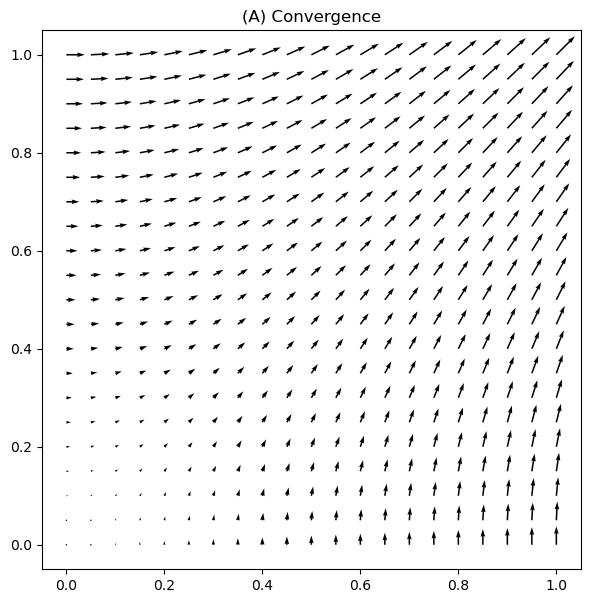

In [6]:
U, V = simulate_convergence(X1, X2)

# creating plot
fig, ax = plt.subplots(figsize = (7, 7))

# quiver plot visualises 2 in 1 
# swapping U and V to have the classical plot
ax.quiver(X1, X2, U, V, color = 'black')

# Add streamlines
# ax.contour(X1, X2, psi, levels = 20, cmap = 'coolwarm')

ax.set_aspect('equal')
plt.title('(A) Convergence')
 
# show plot
plt.show()

In [7]:
# Define line segments: [(x_start, x_end), (y_start, y_end)]
lines = [
    ([0.50, 0.00], [0.00, 1.00]),  
    ([1.00, 0.00], [0.00, 1.50]),  
    ([1.20, 0.00], [0.00, 1.80]),
    ([1.40, 0.00], [0.00, 2.80]),
    ([0.00, 2.50], [1.50, 3.00]),
    ([0.00, 1.40], [2.00, 3.00]),
    ([2.00, 2.40], [0.00, 3.00]),
    ([0.70, 3.00], [0.00, 0.70]),
    ([1.50, 3.00], [0.00, 0.40]),
]

# Define step size for discretization
step_size = 0.1  # Points every 0.1 units

x_train_lines = torch.empty(0, 2)

for x_coords, y_coords in lines:
    x_start, x_end = x_coords
    y_start, y_end = y_coords

    # Compute Euclidean distance
    line_length = np.sqrt((x_end - x_start) ** 2 + (y_end - y_start) ** 2)
    
    # Compute number of steps
    num_steps = int(line_length / step_size)
    
    # Generate interpolated points
    x_points = np.linspace(x_start, x_end, num_steps)
    y_points = np.linspace(y_start, y_end, num_steps)

    x_train_lines = torch.cat((x_train_lines, torch.tensor([x_points, y_points]).T))

/tmp/ipykernel_516030/1218241312.py:33: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /croot/pytorch-select_1730848721463/work/torch/csrc/utils/tensor_new.cpp:274.)
  x_train_lines = torch.cat((x_train_lines, torch.tensor([x_points, y_points]).T))


In [ ]:
x_train_lines

torch.save(x_train_lines, 'data/sim_data/x_train_lines_discretised.pt')

UV = simulate_convergence(x_train_lines)

torch.Size([196, 2])

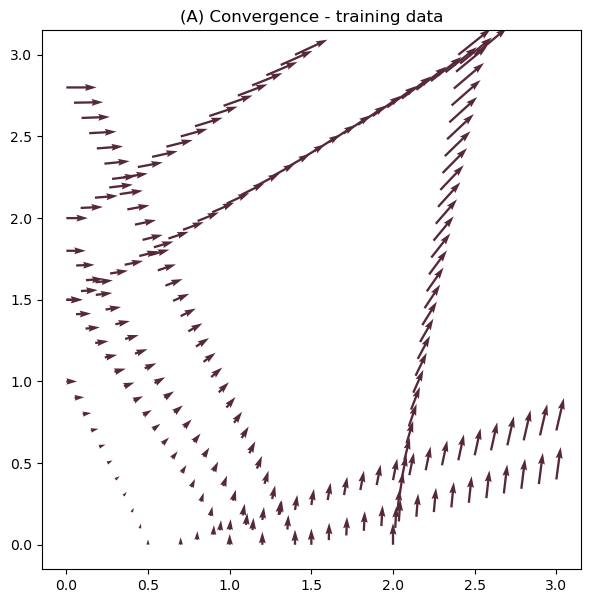

In [28]:
# creating plot
fig, ax = plt.subplots(figsize = (7, 7))

# quiver plot visualises 2 in 1 
# swapping U and V to have the classical plot
ax.quiver(x_train_lines[:, 0], x_train_lines[:, 1], UV[:, 0], UV[:, 1], color = "#55283a")

# Add streamlines
# ax.contour(X1, X2, psi, levels = 20, cmap = 'coolwarm')

ax.set_aspect('equal')
plt.title('(A) Convergence - training data')
 
# show plot
plt.show()

In [ ]:
U, V = simulate_convergence(x_train_lines)

# creating plot
fig, ax = plt.subplots(figsize = (7, 7))

# quiver plot visualises 2 in 1 
# swapping U and V to have the classical plot
ax.quiver(X1_large, X2_large, U, V, color = 'black')

patch_color = "#55283a"
patch_alpha = 0.3

# Define rectangles (covering full area except for hole between (1,2) in x and y)
# Left part (left of the hole)
rect1 = mpatches.Rectangle((0, 0), 1, 3, facecolor = patch_color, alpha = patch_alpha)
# Right part (right of the hole)
rect2 = mpatches.Rectangle((2, 0), 1, 3, facecolor = patch_color, alpha = patch_alpha)
# Bottom part (below the hole)
rect3 = mpatches.Rectangle((1, 0), 1, 1, facecolor = patch_color, alpha = patch_alpha)
# Top part (above the hole)
rect4 = mpatches.Rectangle((1, 2), 1, 1, facecolor = patch_color, alpha = patch_alpha)

# Add rectangles to plot
ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.add_patch(rect4)

path_color = "#55283a"
path_alpha = 1.0

#for x_start_end_coords, y_start_end_coords in lines:
#    ax.plot(x_start_end_coords, y_start_end_coords, color = path_color, alpha = path_alpha)

plt.scatter(x_train_lines[:, 0], x_train_lines[:, 1], color = path_color, alpha = path_alpha, s = 12)

ax.set_aspect('equal')
plt.title('(A) Convergence')
 
# show plot
plt.show()

IndexError: too many indices for tensor of dimension 1

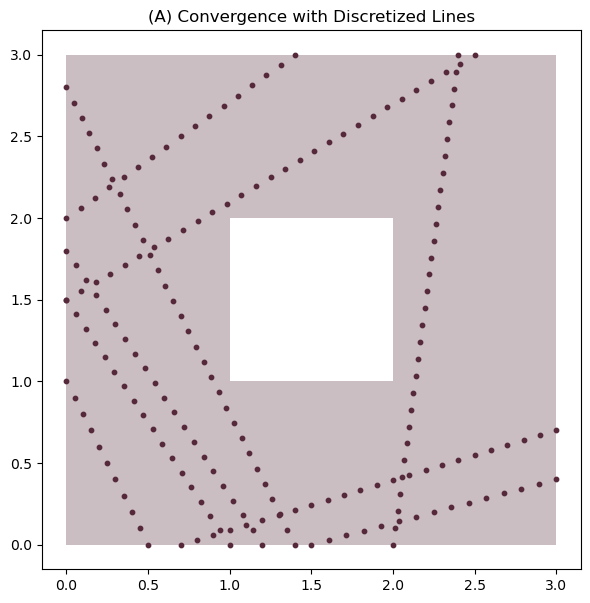

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define line segments: [(x_start, x_end), (y_start, y_end)]
lines = [
    ([0.50, 0.00], [0.00, 1.00]),  
    ([1.00, 0.00], [0.00, 1.50]),  
    ([1.20, 0.00], [0.00, 1.80]),
    ([1.40, 0.00], [0.00, 2.80]),
    ([0.00, 2.50], [1.50, 3.00]),
    ([0.00, 1.40], [2.00, 3.00]),
    ([2.00, 2.40], [0.00, 3.00]),
    ([0.70, 3.00], [0.00, 0.70]),
    ([1.50, 3.00], [0.00, 0.40]),
]

# Define step size for discretization
step_size = 0.1  # Points every 0.1 units

# Create figure
fig, ax = plt.subplots(figsize=(7, 7))

# Discretize each line
for x_coords, y_coords in lines:
    x_start, x_end = x_coords
    y_start, y_end = y_coords

    # Compute Euclidean distance
    line_length = np.sqrt((x_end - x_start) ** 2 + (y_end - y_start) ** 2)
    
    # Compute number of steps
    num_steps = int(line_length / step_size)
    
    # Generate interpolated points
    x_points = np.linspace(x_start, x_end, num_steps)
    y_points = np.linspace(y_start, y_end, num_steps)
    
    # Plot the discrete points
    ax.scatter(x_points, y_points, color = "#55283a", s = 10)  # s = point size

# Add rectangles (overlay structure)
patch_color = "#55283a"
patch_alpha = 0.3
rectangles = [
    ((0, 0), 1, 3),  # Left
    ((2, 0), 1, 3),  # Right
    ((1, 0), 1, 1),  # Bottom
    ((1, 2), 1, 1),  # Top
]
for xy, w, h in rectangles:
    ax.add_patch(mpatches.Rectangle(xy, w, h, facecolor=patch_color, alpha=patch_alpha))

# Set aspect and title
ax.set_aspect("equal")
plt.title("(A) Convergence with Discretized Lines")

# Show plot
plt.show()


In [49]:
x_train_lines = torch.empty(0, 2)

for x_coords, y_coords in lines:
    x_start, x_end = x_coords
    y_start, y_end = y_coords

    # Compute Euclidean distance
    line_length = np.sqrt((x_end - x_start) ** 2 + (y_end - y_start) ** 2)
    
    # Compute number of steps
    num_steps = int(line_length / step_size)
    
    # Generate interpolated points
    x_points = np.linspace(x_start, x_end, num_steps)
    y_points = np.linspace(y_start, y_end, num_steps)

    x_train_lines = torch.cat((x_train_lines, torch.tensor([x_points, y_points]).T))

In [51]:
x_train_lines.shape

torch.Size([196, 2])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Generate some example vector field data
x = np.linspace(0, 3, 10)
y = np.linspace(0, 3, 10)
X, Y = np.meshgrid(x, y)
U = np.cos(X) * np.sin(Y)
V = -np.sin(X) * np.cos(Y)
lw = np.sqrt(U**2 + V**2)

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

# Plot streamlines
ax.streamplot(X, Y, U, V, linewidth=lw, cmap="coolwarm")

# Define rectangles (covering full area except for hole between (1,2) in x and y)
# Left part (left of the hole)
rect1 = patches.Rectangle((0, 0), 1, 3, facecolor="black", alpha=0.3)
# Right part (right of the hole)
rect2 = patches.Rectangle((2, 0), 1, 3, facecolor="black", alpha=0.3)
# Bottom part (below the hole)
rect3 = patches.Rectangle((1, 0), 1, 1, facecolor="black", alpha=0.3)
# Top part (above the hole)
rect4 = patches.Rectangle((1, 2), 1, 1, facecolor="black", alpha=0.3)

# Add rectangles to plot
ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.add_patch(rect4)

# Set limits
ax.set_xlim([0, 3])
ax.set_ylim([0, 3])
ax.set_aspect(1)
ax.set_title("Streamplot with Rectangular Overlay")

plt.show()


In [5]:
# This function actually works for xy ordering
# based on matlab code (xy ordering)

def calc_divergence(f, dx, dy):
    """
    Computes the divergence of the vector field f, corresponding to dFx/dx + dFy/dy + ...
    :param f: List of 2 ndarrays
    :return: Single ndarray of the same shape as each of the items in f, which corresponds to a scalar field
    """
    return np.ufunc.reduce(np.add, [np.gradient(f[0], dx, axis = 1), np.gradient(f[1], dy, axis = 0)])

calc_divergence([U, V], 0.05, 0.05).max()

0.0

## Divergence check

In [6]:
# Along axis = 1 (columns) is x direction
print("Divergence in x-direction are all zero?! True or False?", np.allclose(np.gradient(U, dy, axis = 1), 0))
# Along axis = 0 (rows) is y direction
print("Divergence in y-direction are all zero?! True or False?", np.allclose(np.gradient(V, dy, axis = 0), 0))

print("The vector field divergence free?! True or False?", np.allclose((np.gradient(U, dx, axis = 1) + np.gradient(V, dy, axis = 0)), 0))

Divergence in x-direction are all zero?! True or False? True
Divergence in y-direction are all zero?! True or False? True
The vector field divergence free?! True or False? True


## (B) Merging

(Or merge and curve)

In [7]:
# grid discretisation over domain [0, 4] for x1 and x2
N_grid_x1 = 20 + 1 # 21 so steps are easy numbers
N_grid_x2 = N_grid_x1

N_grid = N_grid_x1 * N_grid_x2

x1 = np.linspace(0, 1, N_grid_x1) # x
x2 = np.linspace(0, 1, N_grid_x2) # y

# define distances
dx = 1 / (N_grid_x1 - 1)
dy = 1 / (N_grid_x2 - 1)

X1, X2 = np.meshgrid(x1, x2)

# U = 1.0 but shape of array
U = np.ones_like(X1) # diverging
# This works too because it does not depend on X1 for x 
# U = (X2+1)**2 # curving
# merging and curve
U = (X2+0.5)**2

V = np.sin(X1 * math.pi)

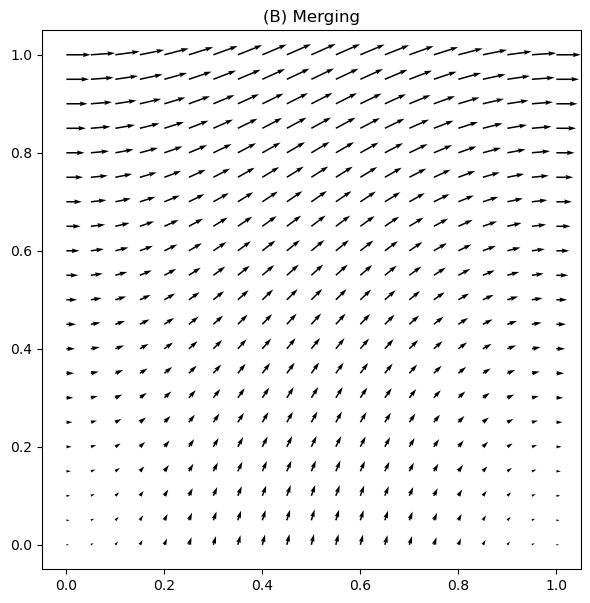

In [8]:
# creating plot
fig, ax = plt.subplots(figsize = (7, 7))

# quiver plot visualises 2 in 1 
ax.quiver(X1, X2, U, V, color = 'black')

ax.set_aspect('equal')
plt.title('(B) Merging')
 
# show plot
plt.show()

In [9]:
# Along axis = 1 (columns) is x direction
print("Divergence in x-direction are all zero?! True or False?", np.allclose(np.gradient(U, dy, axis = 1), 0))
# Along axis = 0 (rows) is y direction
print("Divergence in y-direction are all zero?! True or False?", np.allclose(np.gradient(V, dy, axis = 0), 0))

print("The vector field divergence free?! True or False?", np.allclose((np.gradient(U, dx, axis = 1) + np.gradient(V, dy, axis = 0)), 0))

Divergence in x-direction are all zero?! True or False? True
Divergence in y-direction are all zero?! True or False? True
The vector field divergence free?! True or False? True


# (C) Branching

X and y components have non-zero divergence.

In [10]:
# grid discretisation over domain [0, 4] for x1 and x2
N_grid_x1 = 20 + 1 # 21 so steps are easy numbers
N_grid_x2 = N_grid_x1

N_grid = N_grid_x1 * N_grid_x2

x1 = np.linspace(0, 1, N_grid_x1) # x
x2 = np.linspace(0, 1, N_grid_x2) # y

# define distances
dx = 1 / (N_grid_x1 - 1)
dy = 1 / (N_grid_x2 - 1)

X1, X2 = np.meshgrid(x1, x2)

U = X1 * X2 # diverging
V = - 0.5 * X2**2 + (X1 - 0.8)

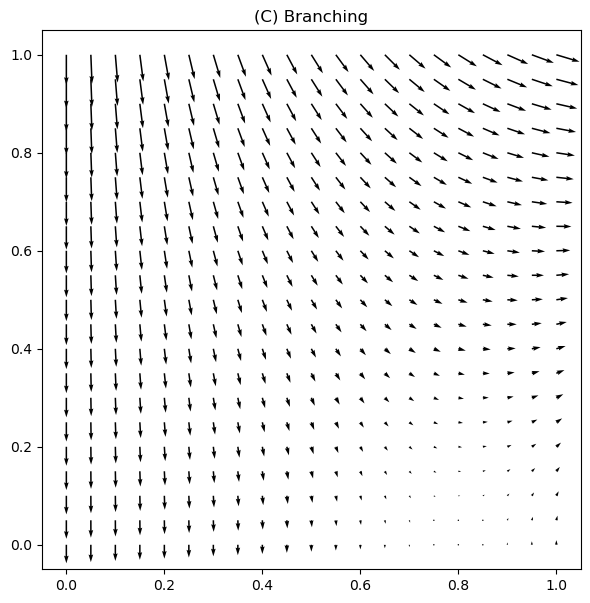

In [11]:
# creating plot
fig, ax = plt.subplots(figsize = (7, 7))

# quiver plot visualises 2 in 1 
ax.quiver(X1, X2, U, V, color = 'black')

ax.set_aspect('equal')
plt.title('(C) Branching')
 
# show plot
plt.show()

In [12]:
# Along axis = 1 (columns) is x direction
print("Divergence in x-direction are all zero?! True or False?", np.allclose(np.gradient(U, dy, axis = 1), 0))
# Along axis = 0 (rows) is y direction
print("Divergence in y-direction are all zero?! True or False?", np.allclose(np.gradient(V, dy, axis = 0), 0))

print("The vector field divergence free?! True or False?", np.allclose((np.gradient(U, dx, axis = 1) + np.gradient(V, dy, axis = 0)), 0, atol = 0.05))

Divergence in x-direction are all zero?! True or False? False
Divergence in y-direction are all zero?! True or False? False
The vector field divergence free?! True or False? True


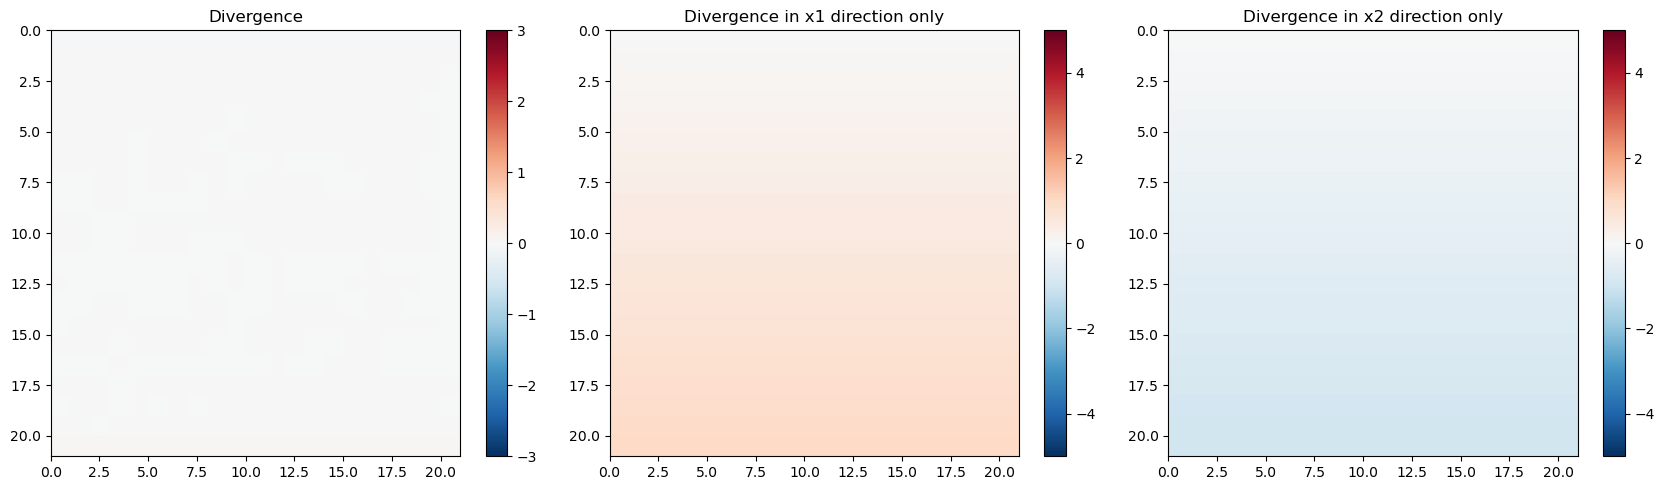

In [13]:
# Compute gradients (finite differences)
# Create a figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 3, figsize = (17, 5))

combined_color_max = 3
color_max = 5

# First subplot: Divergence
c1 = axs[0].pcolormesh((np.gradient(U, dx, axis = 1) + np.gradient(V, dy, axis = 0)), cmap = 'RdBu_r', vmin = - combined_color_max, vmax = combined_color_max)
# Invert y-axis to match tensor indexing
axs[0].invert_yaxis()
axs[0].set_title('Divergence')
fig.colorbar(c1, ax = axs[0])

# First subplot: Divergence in x1 direction
c2 = axs[1].pcolormesh(np.gradient(U, dx, axis = 1), cmap = 'RdBu_r', vmin = - color_max, vmax = color_max)
axs[1].invert_yaxis()
axs[1].set_title('Divergence in x1 direction only')
fig.colorbar(c2, ax = axs[1])

# Second subplot: Divergence in x2 direction
c3 = axs[2].pcolormesh(np.gradient(V, dy, axis = 0), cmap = 'RdBu_r', vmin = - color_max, vmax = color_max)
axs[2].invert_yaxis()
axs[2].set_title('Divergence in x2 direction only')
fig.colorbar(c3, ax = axs[2])

# Show the plot
plt.tight_layout()
plt.show()

# (D) Deflection

In [ ]:
# grid discretisation over domain [0, 4] for x1 and x2
N_grid_x1 = 20 + 1 # 21 so steps are easy numbers
N_grid_x2 = N_grid_x1

N_grid = N_grid_x1 * N_grid_x2

x1 = np.linspace(0, 1, N_grid_x1) # x
x2 = np.linspace(0, 1, N_grid_x2) # y

# define distances
dx = 1 / (N_grid_x1 - 1)
dy = 1 / (N_grid_x2 - 1)

X1, X2 = np.meshgrid(x1, x2)

# lift and shift coordinates to replicate x1 = np.linspace(-3, 3, N_grid_x1), x2 = np.linspace(-3, 3, N_grid_x2) 
U = (X2 * 6 - 3)**2 + (X1 * 6 - 3)**2 + 3
# PDE is 2 X1

V = -2*(X2 * 6 - 3) * (X1 * 6 - 3)
# PDE: -2 X1

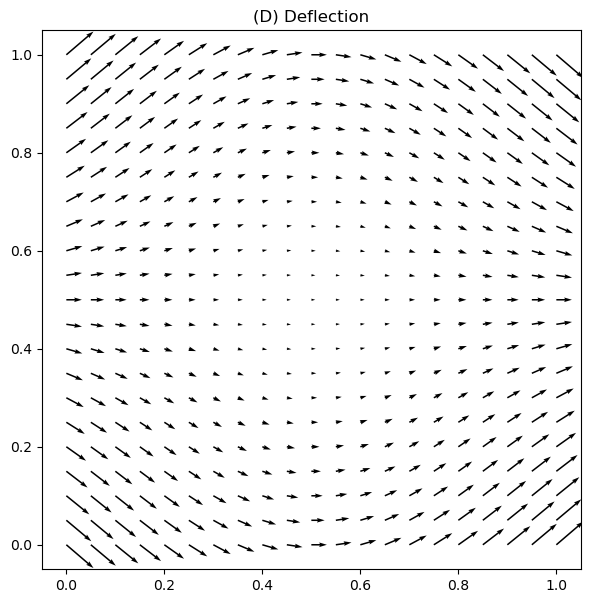

In [29]:
# creating plot
fig, ax = plt.subplots(figsize = (7, 7))

# quiver plot visualises 2 in 1 
ax.quiver(X1, X2, U, V, color = 'black')

ax.set_aspect('equal')
plt.title('(D) Deflection')
 
# show plot
plt.show()

In [30]:
# Along axis = 1 (columns) is x direction
print("Divergence in x-direction are all zero?! True or False?", np.allclose(np.gradient(U, dy, axis = 1), 0))
# Along axis = 0 (rows) is y direction
print("Divergence in y-direction are all zero?! True or False?", np.allclose(np.gradient(V, dy, axis = 0), 0))

print("The vector field divergence free?! True or False?", np.allclose((np.gradient(U, dx, axis = 1) + np.gradient(V, dy, axis = 0)), 0, atol = 0.5))

Divergence in x-direction are all zero?! True or False? False
Divergence in y-direction are all zero?! True or False? False
The vector field divergence free?! True or False? False


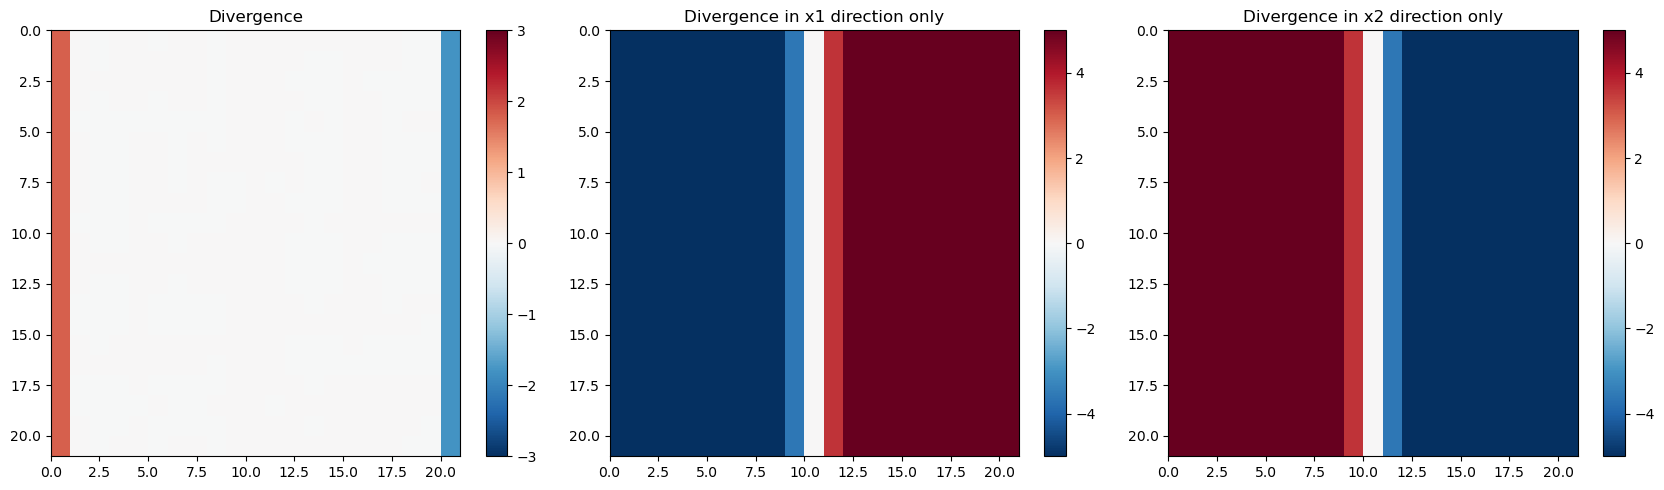

In [31]:
# Compute gradients (finite differences)
# Create a figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 3, figsize = (17, 5))

combined_color_max = 3
color_max = 5

# First subplot: Divergence
c1 = axs[0].pcolormesh((np.gradient(U, dx, axis = 1) + np.gradient(V, dy, axis = 0)), cmap = 'RdBu_r', vmin = - combined_color_max, vmax = combined_color_max)
# Invert y-axis to match tensor indexing
axs[0].invert_yaxis()
axs[0].set_title('Divergence')
fig.colorbar(c1, ax = axs[0])

# First subplot: Divergence in x1 direction
c2 = axs[1].pcolormesh(np.gradient(U, dx, axis = 1), cmap = 'RdBu_r', vmin = - color_max, vmax = color_max)
axs[1].invert_yaxis()
axs[1].set_title('Divergence in x1 direction only')
fig.colorbar(c2, ax = axs[1])

# Second subplot: Divergence in x2 direction
c3 = axs[2].pcolormesh(np.gradient(V, dy, axis = 0), cmap = 'RdBu_r', vmin = - color_max, vmax = color_max)
axs[2].invert_yaxis()
axs[2].set_title('Divergence in x2 direction only')
fig.colorbar(c3, ax = axs[2])

# Show the plot
plt.tight_layout()
plt.show()

# (E) Ridge

In [32]:
# grid discretisation over domain [0, 4] for x1 and x2
N_grid_x1 = 20 + 1 # 21 so steps are easy numbers
N_grid_x2 = N_grid_x1

N_grid = N_grid_x1 * N_grid_x2

x1 = np.linspace(0, 1, N_grid_x1) # x
x2 = np.linspace(0, 1, N_grid_x2) # y

# define distances
dx = 1 / (N_grid_x1 - 1)
dy = 1 / (N_grid_x2 - 1)

X1, X2 = np.meshgrid(x1, x2)

U = X2 + 1
V = - np.cos(3 * X1**3 * math.pi)

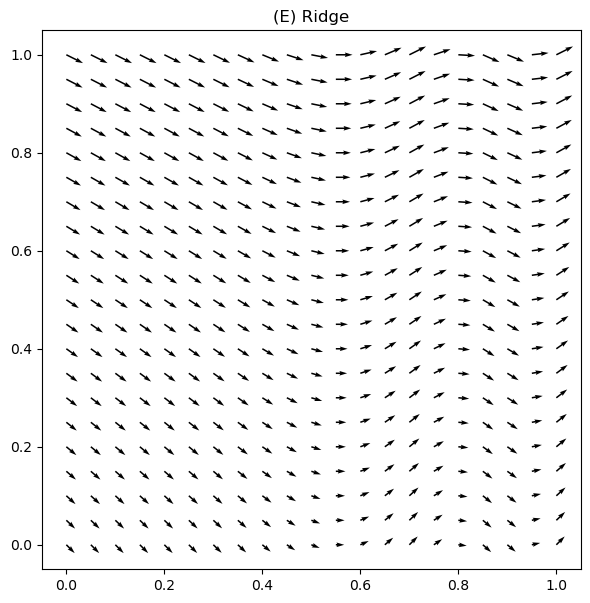

In [33]:
# creating plot
fig, ax = plt.subplots(figsize = (7, 7))

# quiver plot visualises 2 in 1 
ax.quiver(X1, X2, U, V, color = 'black')

ax.set_aspect('equal')
plt.title('(E) Ridge')
 
# show plot
plt.show()

In [34]:
# Along axis = 1 (columns) is x direction
print("Divergence in x-direction are all zero?! True or False?", np.allclose(np.gradient(U, dy, axis = 1), 0))
# Along axis = 0 (rows) is y direction
print("Divergence in y-direction are all zero?! True or False?", np.allclose(np.gradient(V, dy, axis = 0), 0))

print("The vector field divergence free?! True or False?", np.allclose((np.gradient(U, dx, axis = 1) + np.gradient(V, dy, axis = 0)), 0, atol = 0.5))

Divergence in x-direction are all zero?! True or False? True
Divergence in y-direction are all zero?! True or False? True
The vector field divergence free?! True or False? True


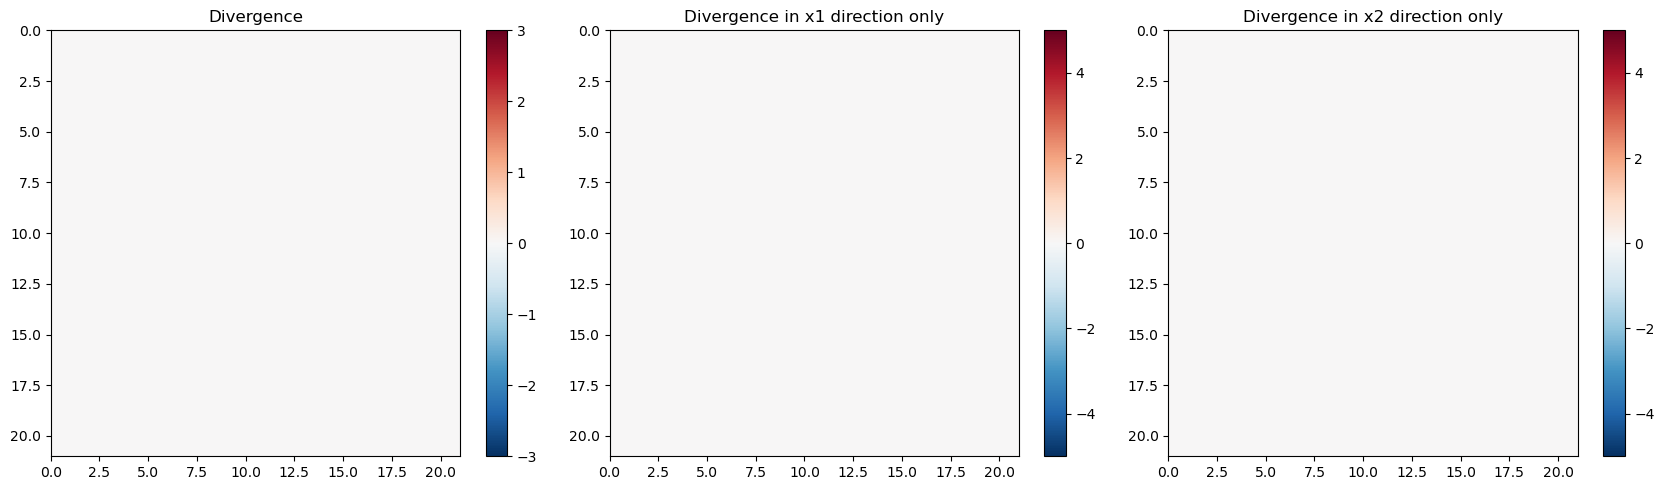

In [35]:
# Compute gradients (finite differences)
# Create a figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 3, figsize = (17, 5))

combined_color_max = 3
color_max = 5

# First subplot: Divergence
c1 = axs[0].pcolormesh((np.gradient(U, dx, axis = 1) + np.gradient(V, dy, axis = 0)), cmap = 'RdBu_r', vmin = - combined_color_max, vmax = combined_color_max)
# Invert y-axis to match tensor indexing
axs[0].invert_yaxis()
axs[0].set_title('Divergence')
fig.colorbar(c1, ax = axs[0])

# First subplot: Divergence in x1 direction
c2 = axs[1].pcolormesh(np.gradient(U, dx, axis = 1), cmap = 'RdBu_r', vmin = - color_max, vmax = color_max)
axs[1].invert_yaxis()
axs[1].set_title('Divergence in x1 direction only')
fig.colorbar(c2, ax = axs[1])

# Second subplot: Divergence in x2 direction
c3 = axs[2].pcolormesh(np.gradient(V, dy, axis = 0), cmap = 'RdBu_r', vmin = - color_max, vmax = color_max)
axs[2].invert_yaxis()
axs[2].set_title('Divergence in x2 direction only')
fig.colorbar(c3, ax = axs[2])

# Show the plot
plt.tight_layout()
plt.show()

# (!) Helper for sin shifting

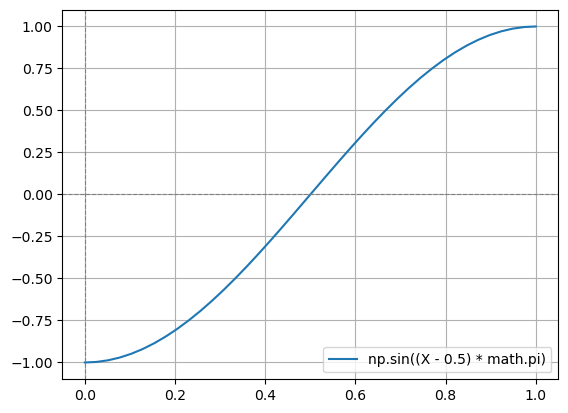

In [ ]:
# Generate X values
X = np.linspace(0, 1, 40)  # Range from -10 to 10 with 400 points

# Compute Y values
Y = np.sin((X - 0.5) * math.pi)

# Plot the function
plt.plot(X, Y, label=r'np.sin((X - 0.5) * math.pi)')
plt.axhline(0, color = 'gray', linestyle = '--', linewidth = 0.8)  # Horizontal axis
plt.axvline(0, color = 'gray', linestyle = '--', linewidth = 0.8)  # Vertical axis
plt.legend()
plt.grid()
plt.show()